In [218]:
import numpy as np

from scipy.stats import gmean,hmean, beta

from plotly.offline import iplot
import plotly.graph_objects as go

def rms(x):
    return np.sqrt(np.mean(x**2))


# Fixed distance example

In [245]:
a, b = 2.31, 0.627

x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
t_i = beta.pdf(x, a, b)

In [246]:
x

array([0.18191403, 0.19017495, 0.19843588, 0.2066968 , 0.21495773,
       0.22321865, 0.23147958, 0.2397405 , 0.24800143, 0.25626235,
       0.26452328, 0.2727842 , 0.28104513, 0.28930605, 0.29756698,
       0.30582791, 0.31408883, 0.32234976, 0.33061068, 0.33887161,
       0.34713253, 0.35539346, 0.36365438, 0.37191531, 0.38017623,
       0.38843716, 0.39669808, 0.40495901, 0.41321993, 0.42148086,
       0.42974178, 0.43800271, 0.44626364, 0.45452456, 0.46278549,
       0.47104641, 0.47930734, 0.48756826, 0.49582919, 0.50409011,
       0.51235104, 0.52061196, 0.52887289, 0.53713381, 0.54539474,
       0.55365566, 0.56191659, 0.57017751, 0.57843844, 0.58669937,
       0.59496029, 0.60322122, 0.61148214, 0.61974307, 0.62800399,
       0.63626492, 0.64452584, 0.65278677, 0.66104769, 0.66930862,
       0.67756954, 0.68583047, 0.69409139, 0.70235232, 0.71061324,
       0.71887417, 0.7271351 , 0.73539602, 0.74365695, 0.75191787,
       0.7601788 , 0.76843972, 0.77670065, 0.78496157, 0.79322

In [247]:
t_i

array([ 0.13003111,  0.1383431 ,  0.1468284 ,  0.1554866 ,  0.16431756,
        0.17332135,  0.18249826,  0.19184879,  0.20137363,  0.21107369,
        0.22095003,  0.23100392,  0.24123677,  0.25165022,  0.26224605,
        0.27302621,  0.28399286,  0.29514832,  0.30649508,  0.31803584,
        0.32977346,  0.34171103,  0.35385182,  0.36619929,  0.37875714,
        0.39152929,  0.40451988,  0.41773329,  0.43117416,  0.4448474 ,
        0.45875818,  0.47291198,  0.48731458,  0.50197208,  0.51689094,
        0.53207796,  0.54754035,  0.56328573,  0.57932214,  0.59565811,
        0.61230264,  0.6292653 ,  0.64655619,  0.66418606,  0.6821663 ,
        0.70050901,  0.71922706,  0.73833413,  0.75784482,  0.77777466,
        0.79814027,  0.81895938,  0.84025098,  0.8620354 ,  0.88433446,
        0.90717161,  0.93057208,  0.95456307,  0.97917393,  1.00443642,
        1.03038495,  1.05705688,  1.08449286,  1.11273723,  1.14183844,
        1.17184958,  1.20282897,  1.23484089,  1.26795632,  1.30

In [259]:
n = 30
mu= 100
sigma=10

# t_i = sigma * np.random.randn(n) + mu
# t_i = 1/np.random.randint(10,30,n)

a, b = 5, 1

x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), n)
t_i = 1/beta.pdf(x, a, b)

x_i = 1000
v_i = x_i/t_i

harmonic_mean_v = hmean(v_i)
arithmetic_mean_v = np.mean(v_i)
geometric_mean_v = gmean(v_i)

x_predicted_harmonic = harmonic_mean_v*t_i
x_predicted_geometric = geometric_mean*t_i
x_predicted_arithmetic  = arithmetic_mean_v*t_i

In [267]:
(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum() ,n*x_i

(29999.999999999996, 86671.77691457998, 53714.7791012345, 30000)

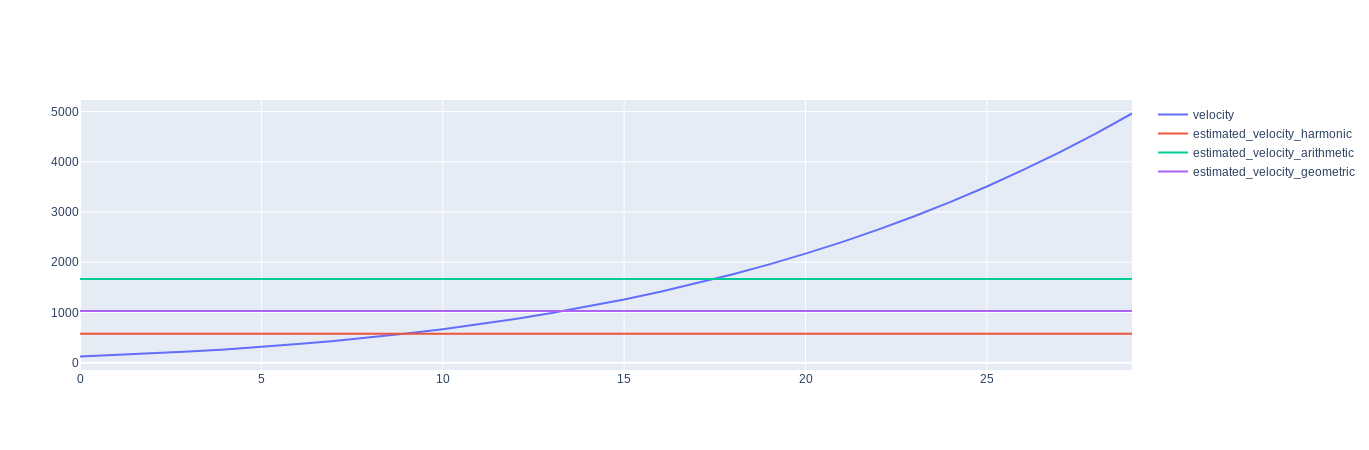

In [260]:
iplot(go.Figure(data=[go.Scatter(x=list(range(n)),y=sorted(v_i),name='velocity'),
                     go.Scatter(x=list(range(n)),y=harmonic_mean_v.repeat(n),name='estimated_velocity_harmonic'),
                     go.Scatter(x=list(range(n)),y=arithmetic_mean_v.repeat(n),name='estimated_velocity_arithmetic'),
                       go.Scatter(x=list(range(n)),y=geometric_mean_v.repeat(n),name='estimated_velocity_geometric')
                     ]))

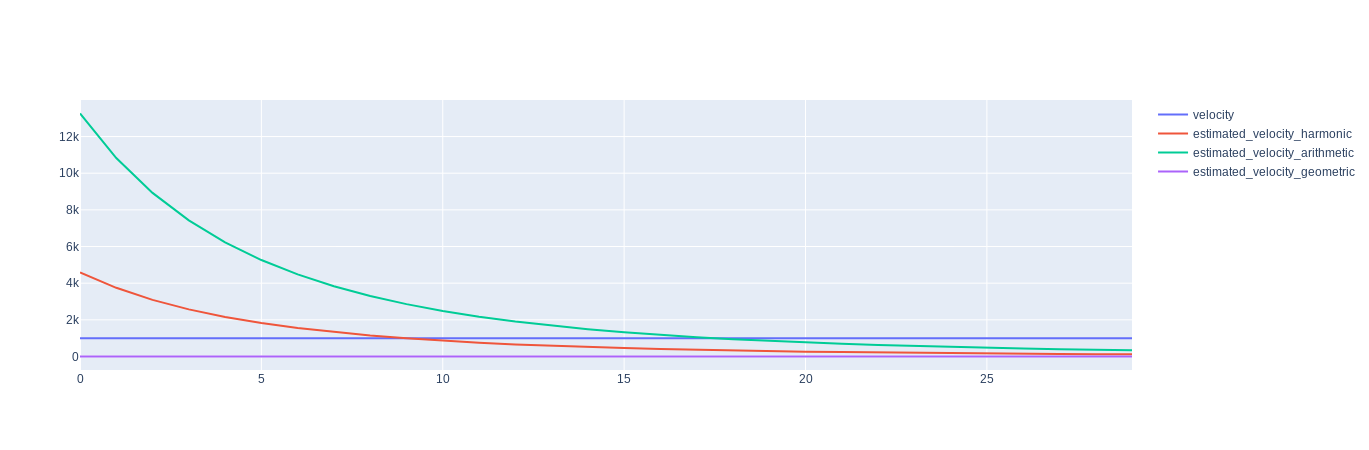

In [263]:
iplot(go.Figure(data=[go.Scatter(x=list(range(n)),y=np.repeat(x_i,n),name='velocity'),
                      go.Scatter(x=list(range(n)),y=x_predicted_harmonic,name='estimated_velocity_harmonic'),
                      go.Scatter(x=list(range(n)),y=x_predicted_arithmetic,name='estimated_velocity_arithmetic'),
                      go.Scatter(x=list(range(n)),y=x_predicted_geometric,name='estimated_velocity_geometric')
                     ]))

In [143]:
rms(v_i - harmonic_mean_v)

0.015562206412043693

In [144]:
rms(v_i - arithmetic_mean_v)

0.015093337734424039

# Fixed time example

In [268]:
n = 100
mu= 10
sigma=1

x_i = sigma * np.random.randn(n) + mu
x_i = np.linspace(1,100,n)
t_i = 10
v_i = x_i/t_i

harmonic_mean_v = hmean(v_i)
arithmetic_mean_v = np.mean(v_i)
geometric_mean_v = gmean(v_i)

In [271]:
(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum() , x_i.sum()/n

(19.277563597396007, 50.5, 37.99268934483429, 50.5)

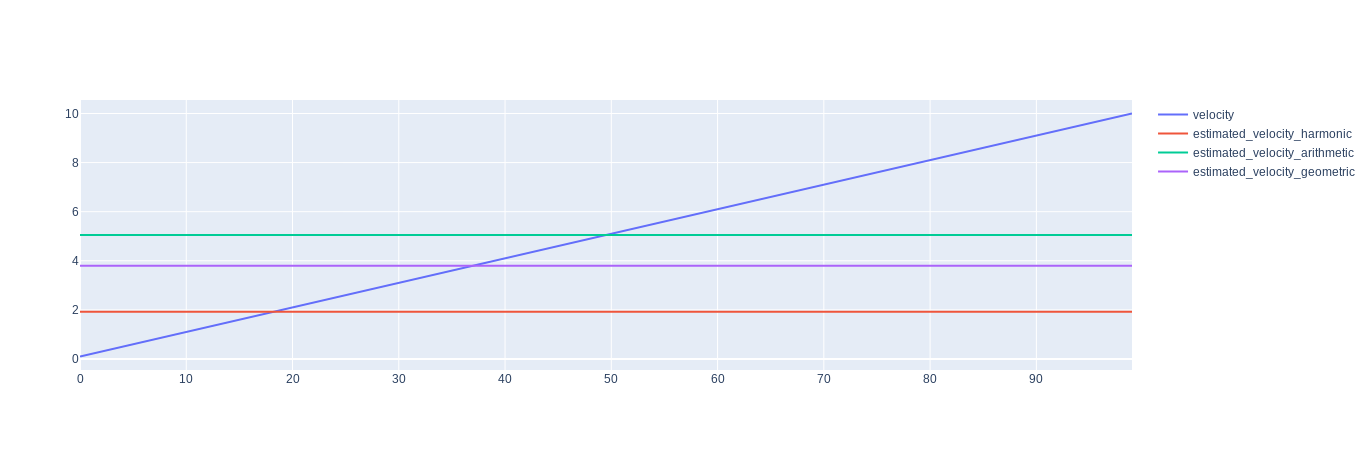

In [191]:
iplot(go.Figure(data=[go.Scatter(x=list(range(n)),y=v_i,name='velocity'),
                      go.Scatter(x=list(range(n)),y=[harmonic_mean_v for i in range(n)],name='estimated_velocity_harmonic'),
                      go.Scatter(x=list(range(n)),y=[arithmetic_mean_v for i in range(n)],name='estimated_velocity_arithmetic'),
                      go.Scatter(x=list(range(n)),y=[geometric_mean_v for i in range(n)],name='estimated_velocity_geometric')
                     ]))

# Population example

In [186]:
horizon = 150
mu=1.1
sigma=0.2
alpha_t = sigma * np.random.randn(horizon) + mu

geometric_mean_alpha = gmean(alpha_t)
arithmetic_mean_alpha = np.mean(alpha_t)
harmonic_mean_alpha = hmean(alpha_t)

In [187]:
geometric_mean_alpha, arithmetic_mean_alpha, harmonic_mean_alpha

(1.079455814042616, 1.0972278532935908, 1.061289376637652)

In [188]:
initial_population = 10
population = [initial_population]
estimated_population_geometric = [initial_population]
estimated_population_arithmetic = [initial_population]
estimated_population_harmonic = [initial_population]

for i in range(horizon):
    population.append(population[-1]*alpha_t[i])
    estimated_population_geometric.append(estimated_population_geometric[-1]*geometric_mean_alpha)
    estimated_population_arithmetic.append(estimated_population_arithmetic[-1]*arithmetic_mean_alpha)
    estimated_population_harmonic.append(estimated_population_harmonic[-1]*harmonic_mean_alpha)

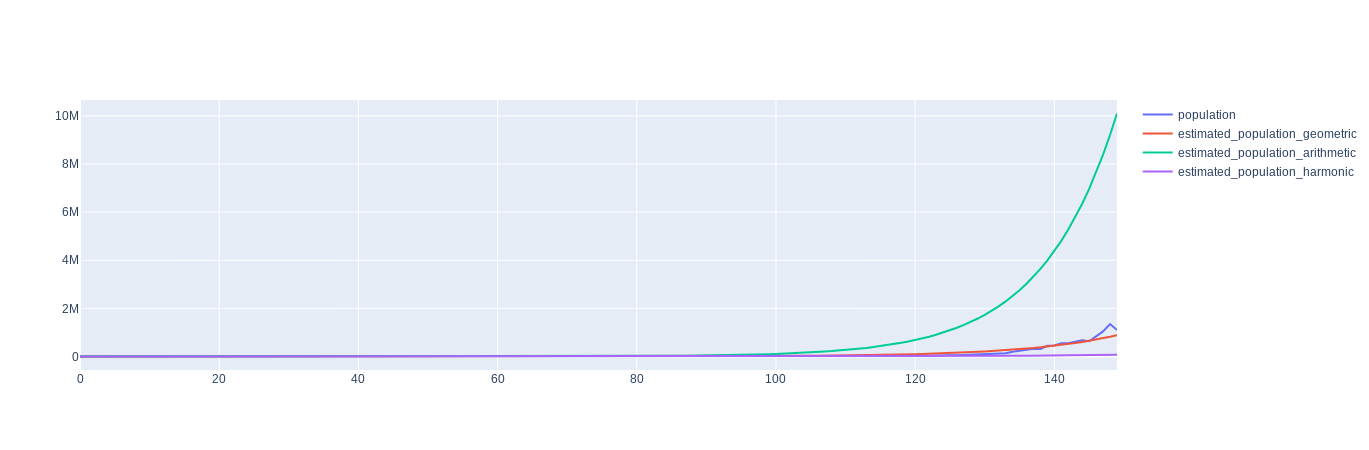

In [189]:
iplot(go.Figure(data=[go.Scatter(x=list(range(horizon)),y=population,name='population'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_geometric,name='estimated_population_geometric'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_arithmetic,name='estimated_population_arithmetic'),
                      go.Scatter(x=list(range(horizon)),y=estimated_population_harmonic,name='estimated_population_harmonic')]))